In [61]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [53]:
np.random.seed(42)

# Создаем случайные данные с линейной зависимостью и шумом
n = 50
X = np.random.rand(n)
# Создаем истинную линейную зависимость y = 2 + 3x
y_true = 2 + 3*x
# Добавляем случайный шум
noise = np.random.normal(0, 0.5, n)
y = y_true + noise

# Выводим первые 5 строк данных
for i in range(5):
    print(f"Наблюдение {i+1}: x={X[i]}, y={y[i]}")

Наблюдение 1: x=0.3745401188473625, y=3.4928536465397926
Наблюдение 2: x=0.9507143064099162, y=4.937827059824734
Наблюдение 3: x=0.7319939418114051, y=4.1381576842400944
Наблюдение 4: x=0.5986584841970366, y=3.6454236047964654
Наблюдение 5: x=0.15601864044243652, y=1.728794926143596


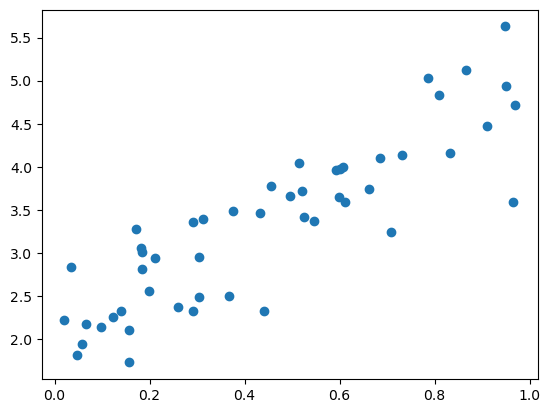

In [54]:
plt.scatter(X, y)

In [55]:
# функция, определяющая среднеквадратичную ошибку
def mse(X, w1, w0, y):
    y_pred = w1 * X + w0
    return np.sum((y - y_pred) ** 2) / len(y_pred)

In [56]:
# установка минимального значения, на которое должны изменяться веса
eps = 0.0001

# первоначальное точка
w1 = 0
w0 = 0

# размер шага (learning rate)
learning_rate = 0.1

next_w1 = w1
next_w0 = w0
k=0

while True:
    k += 1
    cur_w1 = next_w1
    cur_w0 = next_w0
    y_pred = cur_w1 * X + cur_w0

    #сдвига
    next_w0 = cur_w0 - learning_rate * (2/len(X)*np.sum((y - y_pred)) * (-1))
    #наклона
    next_w1 = cur_w1 - learning_rate * (2/len(X)*np.sum((y - y_pred) * (-X)))

    # остановка когда достигнута необходимая степень точности
    print(f"Номер итерации: {k}")
    print(f"Точка: {cur_w1, cur_w0}")
    print(f"MSE: {mse(X, cur_w1, cur_w0, y)}")
    print("--------------------------------------------------------")
    
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        break

Номер итерации: 1
Точка: (0, 0)
MSE: 12.018919634385638
--------------------------------------------------------
Номер итерации: 2
Точка: (0.34479041949658856, 0.6672598140886664)
MSE: 7.061538865680923
--------------------------------------------------------
Номер итерации: 3
Точка: (0.6107195349128198, 1.1703176073478068)
MSE: 4.215906848417164
--------------------------------------------------------
Номер итерации: 4
Точка: (0.8168578774613142, 1.5490470120675217)
MSE: 2.5816050914748883
--------------------------------------------------------
Номер итерации: 5
Точка: (0.9776494947885743, 1.833646132932459)
MSE: 1.6421631556509573
--------------------------------------------------------
Номер итерации: 6
Точка: (1.1040345291718254, 2.046985264465985)
MSE: 1.1013384942906255
--------------------------------------------------------
Номер итерации: 7
Точка: (1.2042994086508938, 2.20638494809502)
MSE: 0.7892085947168433
--------------------------------------------------------
Номер итер

Получившиеся коэффициенты равны:

In [52]:
coef_naklona = 2.880892192391606
coef_sdviga = 2.051878603971828
y_raschet = coef_naklona * X + coef_sdviga

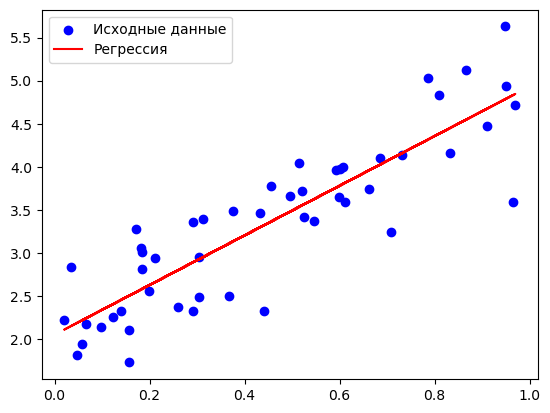

In [60]:
plt.scatter(x, y, color='blue', label='Исходные данные')
plt.plot(X, y_raschet, color='r', label='Регрессия')
plt.legend()